<a href="https://colab.research.google.com/github/GKandula/VIP-IPA-Personal/blob/main/VIP_IPA_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

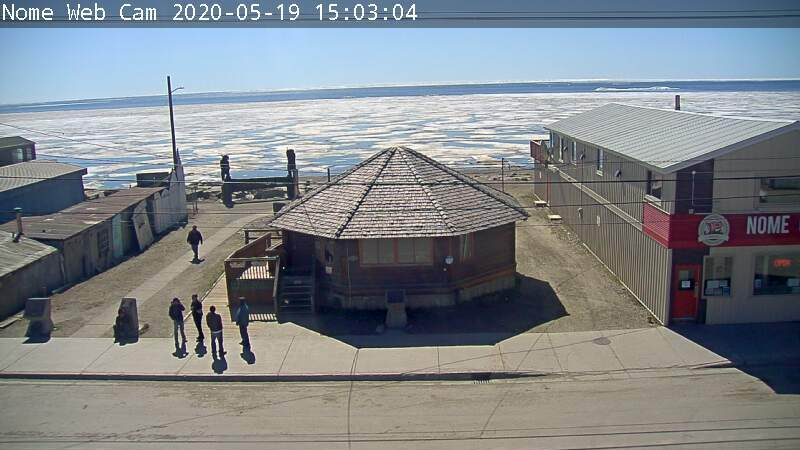

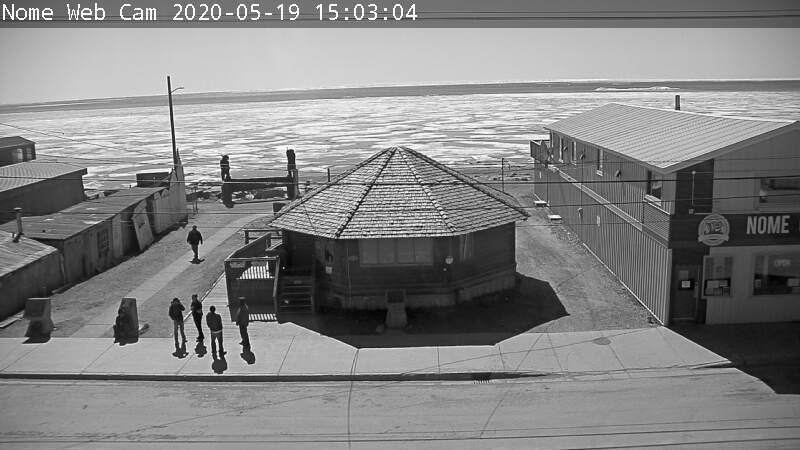

In [2]:
#Libraries I used for grayscaling
import numpy as np
import PIL
from PIL import Image
from PIL import ImageShow

#Grayscaled an image from the Nome, Alaska dataset using the Pillow library, did this to see how the
#Loads image on local drive into Colab
img = Image.open('/content/Intersec.jpg')

display(img)
#uses the convert function in the PIL library to grayscale image
img2 = img.convert('L')

#saves image locally
img2.save('greyscale.jpg')

#displays image to terminal
img2

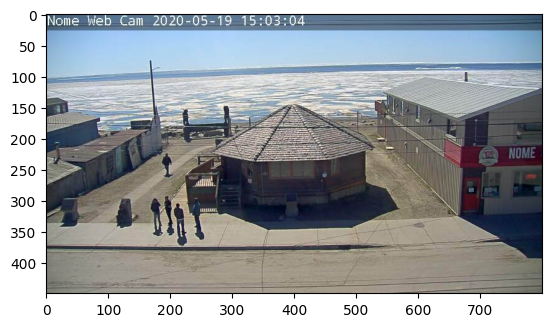

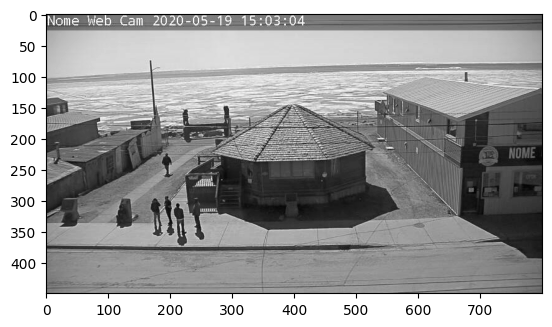

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from numpy import asarray
#grayscaling using matplotlib and the formula Y = 0.2126R + 0.7152G + 0.0722B


#function that splits the image into an array of pixel values and takes the dot product with the correct grayscaling values to return the grayscaled image
def rgb2graysc(rgb):
    return 0.2126 * rgb[:,:,2] + 0.7152 * rgb[:,:,1] + 0.0722 * rgb[:,:,0]
#imports image
img = Image.open('/content/Intersec.jpg')
img.convert('RGB')
img_data = np.array(img)
plt.imshow(img)
plt.show()
gray = rgb2graysc(img_data)

#displays the grayscaled image
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin = 0, vmax = 255)
plt.show()


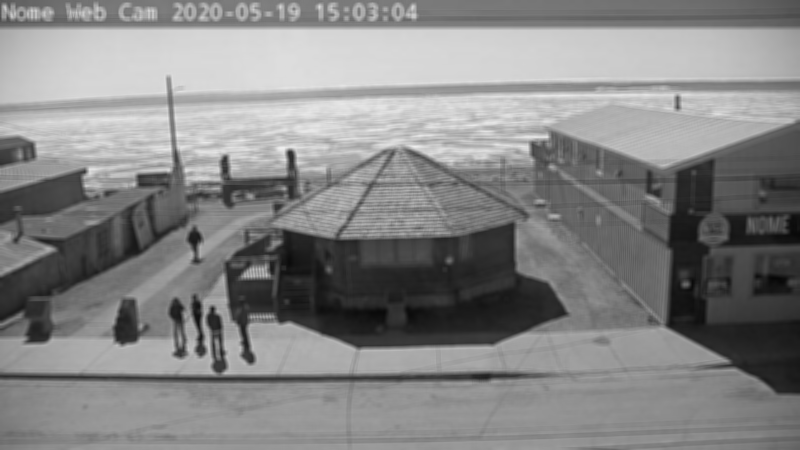

array([[ 1.,  0., -1.],
       [ 2.,  0., -2.],
       [ 1.,  0., -1.]], dtype=float32)

array([[ 1.,  2.,  1.],
       [ 0.,  0.,  0.],
       [-1., -2., -1.]], dtype=float32)

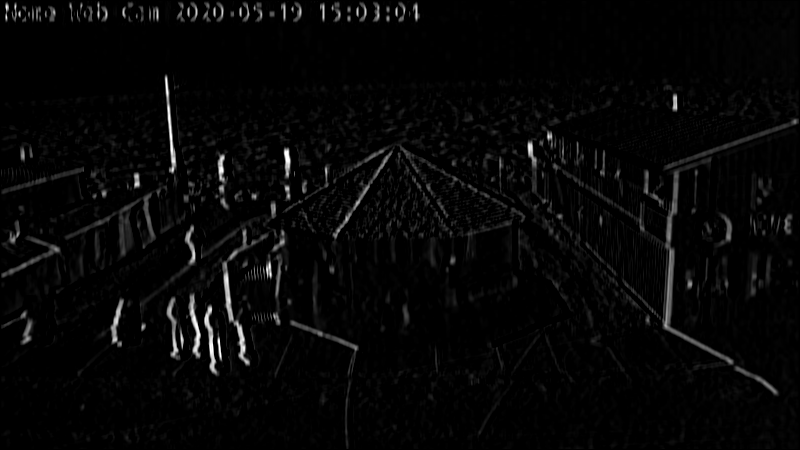

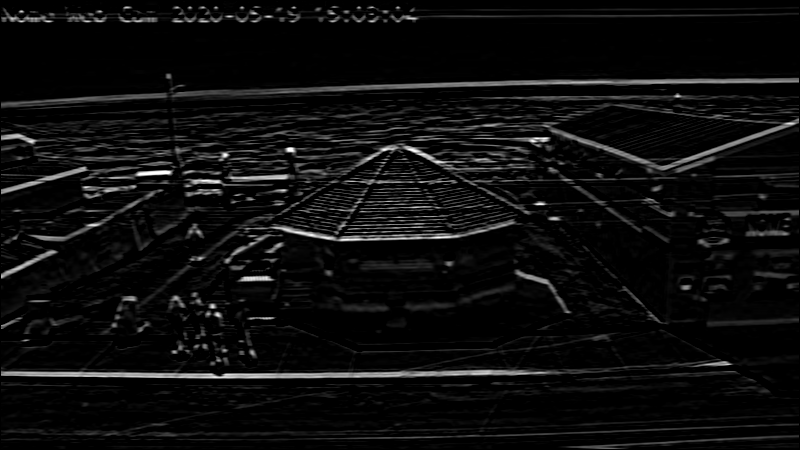

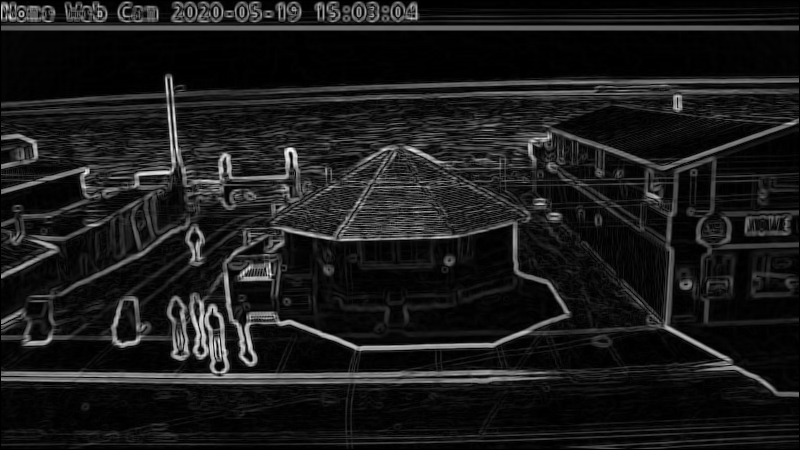

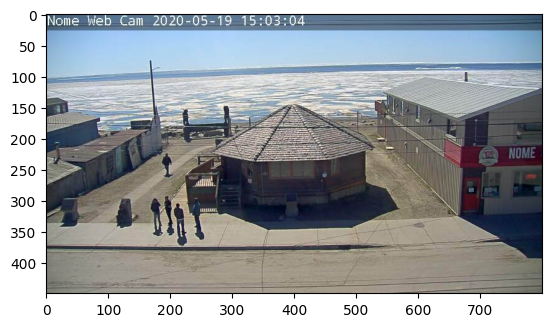

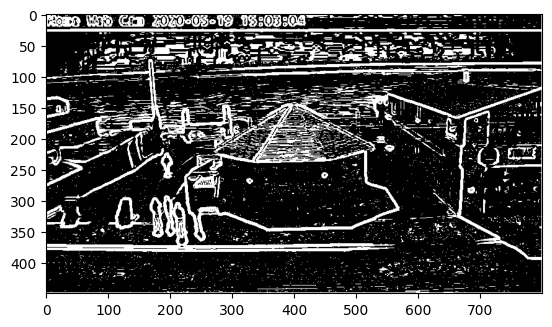

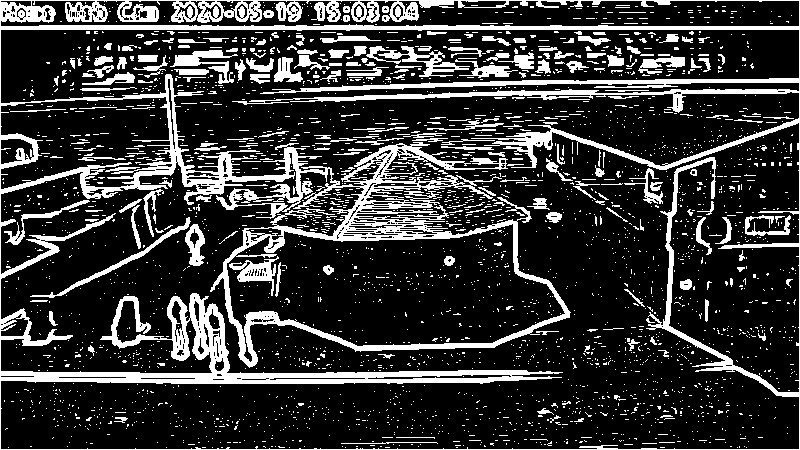

True

In [17]:
#imports used for this algorithm
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

#Open image and process it in grayscale
img = Image.open('/content/Intersec.jpg')
img.convert('RGB')
#converts image to array
img_data = np.array(img)
#grayscaled image
gray = 0.2126 * img_data[:,:,2] + 0.7152 * img_data[:,:,1] + 0.0722 * img_data[:,:,0]
#Apply Gaussian Blur to image using cv2 library.
blur_im = cv2.GaussianBlur(gray, (5,5), 9)
cv2_imshow(blur_im)

#Function for edge detection
def sobel_edge_detection(image):
  horizontal = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], np.float32) #y-direction kernel for Sobel
  display(horizontal)
  vertical = np.array([[1,2,1], [0,0,0], [-1,-2,-1]], np.float32) #x-direction kernel
  display(vertical)
  [rows,columns] = np.shape(image) #the shape of the grayscaled image

  #initialize array of zeros of the image shape for the x and y direction gradient approximation.
  gx = np.zeros((rows, columns), dtype=np.float32)
  gy = np.zeros((rows, columns), dtype=np.float32)


  #for loops to calculate the gradients in the x and y directions.
  for i in range(rows - 2):
    for j in range(columns - 2):
      gx[i+1,j+1] = np.sum(np.multiply(horizontal, image[i:i + 3, j:j + 3])) #x-direction gradient approximation image, we just take the sum of
      gy[i+1,j+1] = np.sum(np.multiply(vertical, image[i:i + 3, j:j + 3]))#y-direction gradient approximation image,

  cv2_imshow(gx)
  cv2_imshow(gy)
  #Compute magnitude using the square root of the sum of the two gradients squared.
  sobel_filtered_image = np.hypot(gx,gy)
  #normalize output to values between 0 and 255 and convert to unsigned int 8 bit for future operations
  sobel_filtered_image = ((255.0*sobel_filtered_image) / sobel_filtered_image.max()).astype(np.uint8)

  cv2_imshow(sobel_filtered_image)
  return sobel_filtered_image

#Call the sobel detector
sobel_filtered_image = sobel_edge_detection(blur_im)


#Calculate threshold value for the image using the cv2 library's threshold function
_, thresh_im = cv2.threshold(sobel_filtered_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#Apply thresholding
edge_detected_image = np.full_like(sobel_filtered_image, 255)
edge_detected_image[sobel_filtered_image > thresh_im] = 0

#Show original image and sobel edge detected image
plt.imshow(img)
plt.show()
plt.imshow(edge_detected_image, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
plt.show()

cv2_imshow(edge_detected_image)

#Save image to files
cv2.imwrite('sobel detected image.png', edge_detected_image.astype(np.uint8))

